In [114]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [186]:
df = pd.read_csv("wine.data",header = None) 
X = df.iloc[:,1:].values
y = df.iloc[:,0].values
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,stratify=y,random_state=0)
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)
covriance_matrix = np.cov(X_train_std.T)
eigen_vals ,eigen_vecs = np.linalg.eig(covriance_matrix)

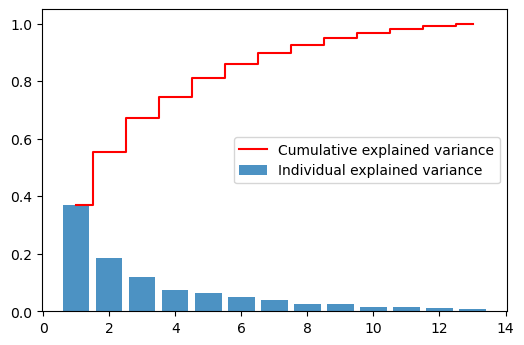

In [187]:
al = sum(eigen_vals)
eigen_vals_percent = [i/al for i in sorted(eigen_vals, reverse = True)]
eigen_vals_cumsum = np.cumsum(eigen_vals_percent)
plt.figure(figsize=(6,4),dpi = 100)
plt.bar(range(1,len(eigen_vals)+1),eigen_vals_percent ,alpha = 0.8,align = 'center',label = 'Individual explained variance')
plt.step(range(1,len(eigen_vals)+1),eigen_vals_cumsum,where = 'mid',color = 'red',label = 'Cumulative explained variance')
plt.legend()
plt.show()

In [188]:
eigen_pairs = [(np.abs(eigen_vals[i]),eigen_vecs[:,i]) for i in range(len(eigen_vals))]
eigen_pairs.sort(key = lambda k: k[0], reverse = True)
w = np.hstack((eigen_pairs[0][1][:,np.newaxis],eigen_pairs[1][1][:,np.newaxis]))
X_train_PCA = X_train_std.dot(w)

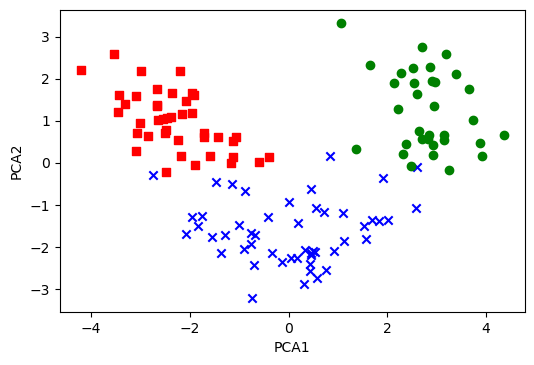

In [189]:
colors = ['r','b','g']
markers = ['s','x','o']
plt.figure(figsize = (6,4),dpi = 100)
plt.xlabel('PCA1')
plt.ylabel('PCA2')
for i,j,k in zip(np.unique(y_train),colors,markers):
    plt.scatter(X_train_PCA[y_train == i,0],
                X_train_PCA[y_train == i,1],
                color = j,
                marker = k,
    )

In [199]:
# np.bincount(y)/np.shape(y)[0]
# np.bincount(y_train)/np.shape(y_train)[0]

In [200]:
from matplotlib.colors import ListedColormap
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_train_pca = pca.fit_transform(X_train_std)
LR = LogisticRegression()
LR.fit(X_train_pca,y_train)

LogisticRegression()

In [201]:
def PlotDesicionRegions(X,y,classifier,resolustion = 0.02):
    x1_min,x1_max = X[:,0].min() - 1,X[:,0].max() + 1
    x2_min,x2_max = X[:,1].min() - 1,X[:,1].max() + 1
    xx1,xx2 = np.meshgrid(np.arange(x1_min,x1_max,resolustion),
                          np.arange(x2_min,x2_max,resolustion))
    xy = np.array([xx1.ravel(),xx2.ravel()]).T 
    pridcited_xy = classifier.predict(xy)
    z = pridcited_xy.reshape(xx1.shape)
    cmap = ListedColormap(['orangered','cyan','forestgreen'])
    plt.figure(figsize=(6,4),dpi=80)
    markers = ['s','x','o']
    plt.contourf(xx1,xx2,z,alpha = 0.6,cmap = cmap)
    for i,j in enumerate(np.unique(y)):
        plt.scatter(x = X[y == j,0],y = X[y == j,1],marker = markers[i],label = j)
    plt.xlabel('PCA1')
    plt.ylabel('PCA2')
    plt.show()

<Figure size 600x400 with 0 Axes>

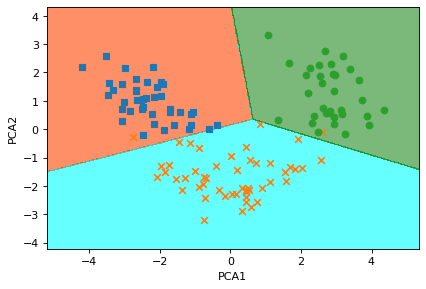

In [202]:
plt.figure(figsize = (6,4),dpi = 100)
PlotDesicionRegions(X_train_pca,y_train,LR)